# Data Mining — Linear Regression — Mini-Project 1 (Energy Consumption)

**Course:** [CSEN911] Data Mining (Winter 2025)  
**Instructor:** Dr. Ayman Alserafi  
**Due:** 24 October 2025, 11:59 PM

**Dataset:** `energy_data.csv`  


> **Instructions:** For every step, write your own explanations and justifications and visualization in the provided Markdown prompts.




***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:Mohamed Mahmoud

ID: 58-9269

Tutorial: T9

---

Name:Mostafa Sameh

ID: 58-5623

Tutorial: T9

---


The dataset contains building-level energy readings and contextual attributes.

Each row represents a building observation. Columns include:

<div style="font-size:20px;">

| **Column** | **Description** |
|-------------|-----------------|
| **Building_ID** | Unique identifier for each building record. Used to distinguish one building entry from another. |
| **Building_Type** | Category describing the primary use of the building (e.g., Residential, Commercial, Industrial, Educational, etc.). |
| **Governorate** | The administrative region (governorate) where the building is located (e.g., Cairo, Giza, Alexandria). |
| **Neighborhood** | The smaller district or local area within the governorate where the building is located. |
| **Day_of_Week** | The day on which the energy consumption measurement was recorded (e.g., Sunday, Monday, etc.). |
| **Occupancy_Level** | The relative number of occupants or activity level in the building, typically categorized as *Low*, *Medium*, or *High*. |
| **Appliances_Usage_Level** | Indicates how intensively appliances are used in the building *Low*, *Medium*, or *High*. |
| **SquareFootage** | The total floor area of the building (numeric). Serves as a proxy for building size, often influencing energy usage. |
| **Last_Maintenance_Date** | The date of the last maintainance done on the building. |
| **Average_Temperature** | The average ambient temperature (in °C) recorded during the data period. |
| **Energy_Consumption** | The total energy used by the building, typically measured in kilowatt-hours (kWh).|

</div>


## Importing Libraries & Dataset

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('energy_data.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/energy_data.csv')

df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

Here I checked the numbers in the dataset to understand how they look. I can see the minimum, maximum,average, and how the values are spread. This helps me know if the numbers are normal or if there might be strange values.

In [6]:
print("\n=== Describe (Numerical) ===")
print(df.describe())


=== Describe (Numerical) ===
       Average_Temperature
count           990.000000
mean             33.499404
std              10.703806
min              -4.910000
25%              29.422500
50%              35.260000
75%              39.970000
max              50.000000


Here I looked at the text columns to see what values are common.  
It shows me which category appears the most and if there are empty or repeated values.  
This helps me understand the text data better.


In [7]:
print("\n=== Describe (Categorical) ===")
print(df.describe(include='object'))


=== Describe (Categorical) ===
        Building_ID Building_Type Governorate Neighborhood Day_of_Week  \
count          1100           990         873         1100        1100   
unique         1100             3           3          848          42   
top     BLD-2099-GL   Residential  Alexandria       Smouha      Sunday   
freq              1           349         310           45          54   

       Occupancy_Level Appliances_Usage_Level SquareFootage  \
count             1100                   1100          1100   
unique               3                      3          1095   
top               High                    Low       49653m2   
freq               368                    381             2   

       Last_Maintenance_Date Energy_Consumption  
count                   1100               1100  
unique                   727               1100  
top               2024-12-31        4722.59 kWh  
freq                      89                  1  


Here I checked how many missing values are in each column.  
I found that some columns have empty data.  
This means I will need to clean and fill them in the next step.


In [13]:
print("\n=== Missing Values ===")
print(df.isna().sum())


=== Missing Values ===
Building_ID                 0
Building_Type             110
Governorate               227
Neighborhood                0
Day_of_Week                 0
Occupancy_Level             0
Appliances_Usage_Level      0
SquareFootage               0
Last_Maintenance_Date       0
Average_Temperature       110
Energy_Consumption          0
dtype: int64


Here I looked at all the unique values in the text columns.  
I noticed that some values are written in different ways and some have symbols or numbers.  
I will clean these to make them clear and consistent.


In [17]:
 cat_cols = ['Building_Type', 'Governorate', 'Neighborhood',
            'Day_of_Week', 'Occupancy_Level', 'Appliances_Usage_Level']

for col in cat_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique values in Building_Type:
['Residential' 'Commercial' 'Industrial' nan]

Unique values in Governorate:
['Alexandria' 'Giza' 'Cairo' nan]

Unique values in Neighborhood:
['Smouha' '+Mohandessin14' 'New Cairo' '+92Dokki' '%9New Cairo'
 'Heliopolis_59' 'Gleem(23' '=Mohandessin10' '*36Smouha' 'Heliopolis$34'
 '-92Mohandessin' '(75Mohandessin' ')Gleem25' ')Maadi19' '*34Heliopolis'
 'Gleem_8' ')84Smouha' '-42Gleem' 'Dokki' '*Mohandessin93' 'New Cairo$29'
 '=Smouha43' 'Mohandessin' '-86Heliopolis' 'Smouha^21' '$11Smouha'
 ')35Mohandessin' 'Maadi@45' '_Gleem84' 'Gleem' '*3Heliopolis' 'Smouha#34'
 ')Gleem16' '%95Gleem' 'Heliopolis' '$Gleem6' 'New Cairo=38' '%Gleem6'
 '_6Gleem' '*39New Cairo' 'Mohandessin=88' 'New Cairo)93' '%23Maadi'
 '+Heliopolis29' '+New Cairo9' 'Heliopolis$17' ')Mohandessin21' '*98Gleem'
 'Heliopolis-35' '%Dokki5' '-Smouha37' '*50New Cairo' 'Smouha@75'
 '#67Maadi' ')20New Cairo' 'Maadi#72' 'New Cairo)94' '&98Smouha'
 '&15Gleem' 'Maadi' 'Mohandessin=35' 'Heliopolis_93'

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

I converted the  Last_Maintenance_Date column to proper datetime values.  
This makes the column consistent and ready for time-related checks.  
Invalid dates become NaT, which will be handled in the missing-values step.



In [19]:
df['Last_Maintenance_Date'] = pd.to_datetime(df['Last_Maintenance_Date'], errors='coerce')


I cleaned Neighborhood by removing numbers and symbols, leaving only the area name.  
Then I standardized the text using title case so the values are consistent and easy to analyze.


In [20]:
df['Neighborhood'] = (
    df['Neighborhood']
      .astype(str)
      .str.replace(r'[^a-zA-Z ]', '', regex=True)
      .str.strip()
      .str.title()
)


I unified the Day_of_Week values so all days follow the same format  
(e.g., “tuesDAY” and “TUESDAY” both become “Tuesday”).  
This avoids duplicate categories caused by different capitalizations.


In [21]:
df['Day_of_Week'] = (
    df['Day_of_Week']
      .astype(str)
      .str.strip()
      .str.lower()
      .str.capitalize()
)


This part of the code is used to clean and fix the numeric columns.  
First, it loops through each numerical column like SquareFootage, Average_Temperature, and Energy_Consumption .  
It removes any symbols or letters from the values, converts them to numbers, and replaces empty values with NaN.  
Then it fills the missing values with the median of each column.  
After this step, all the numeric columns become clean numbers that can be used in calculations and modeling without any errors.


In [24]:
num_cols = ['SquareFootage','Average_Temperature','Energy_Consumption']

for c in num_cols:
    if c in df.columns:
        df[c] = (
            df[c]
            .astype(str)
            .str.replace(r'[^0-9.]', '', regex=True)
            .replace('', np.nan)
            .astype(float)
        )
        df[c] = df[c].fillna(df[c].median())


## Exploratory Data Analysis

**Q1:** What are the most popular neighborhoods? plot all and order them on the graph (mention top 3)

**Visualization**

I counted how many times each neighborhood appears in the dataset  
and plotted them in a bar chart sorted from most to least frequent.  
The top three neighborhoods with the highest counts are the most popular ones.


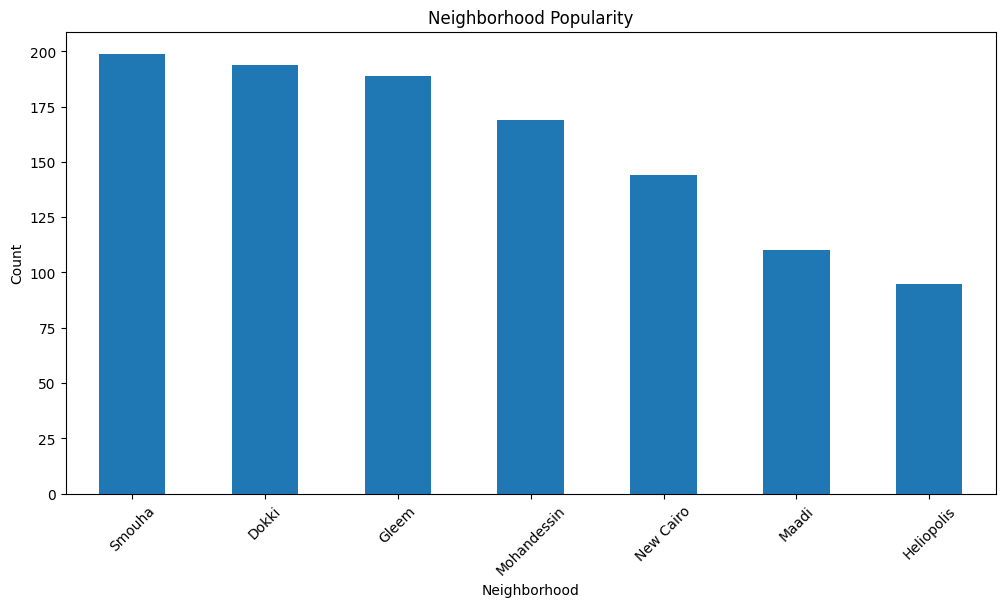

Neighborhood
Smouha    199
Dokki     194
Gleem     189
Name: count, dtype: int64


In [25]:
neigh_counts = df['Neighborhood'].value_counts()

plt.figure(figsize=(12,6))
neigh_counts.plot(kind='bar')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.title('Neighborhood Popularity')
plt.xticks(rotation=45)
plt.show()

top3 = neigh_counts.head(3)
print(top3)


**Answer for Q1:** _Your answer here_

**Q2:** Show the distribution of the energy consumption of each Building type.

Which type have the widest distribution of energy consumption?

Which (on average) has the highest consumption?.

**Visualization**

**Answer for Q2:** _Your answer here_

**Q3:** How does the building size affect energy consumption?

**Visualization**

**Answer for Q3:** _Your answer here_

**Q4:** Do buildings consume more energy if not maintained frequently?

**Visualization**

**Answer for Q4:** _Your answer here_

**Q5:** Are all the numerical variables normally distributed, or is there any skewness?

**Visualization**

**Answer for Q5:** _Your answer here_

**Q6:** What is multicollinearity? And why is it a problem for linear regression? Does this problem exist in this
dataset?

**Visualization**

**Answer for Q6:** _Your answer here_

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

## Modelling

_Apply the linear regression model below._

## Model Evaluation

Evaluate the model you applied.

## Conclusion and Recommendations

Comment on the model performance and your findings from model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for an electrcity company aiming to estimate the energy levels of each building?

**Answer**: your answer here.